# CNN Playground with 2 Datasets

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [53]:
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.cifar10.load_data()
X_train, X_val = X_train / 255.0, X_val / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

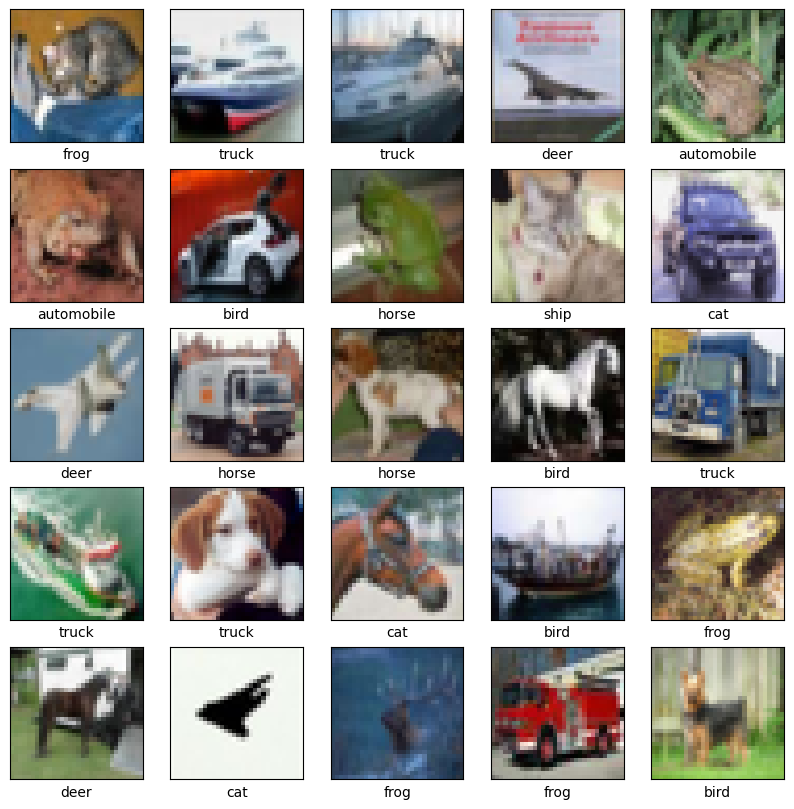

In [54]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

## Model-0

In [55]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 1024)             

In [56]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


In [48]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5137 - accuracy: 0.4476 - val_loss: 1.2491 - val_accuracy: 0.5479
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1724 - accuracy: 0.5838 - val_loss: 1.1618 - val_accuracy: 0.5960
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0206 - accuracy: 0.6398 - val_loss: 1.0091 - val_accuracy: 0.6439
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9160 - accuracy: 0.6785 - val_loss: 0.9525 - val_accuracy: 0.6698
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8395 - accuracy: 0.7054 - val_loss: 0.8924 - val_accuracy: 0.6889
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7810 - accuracy: 0.7253 - val_loss: 0.9059 - val_accuracy: 0.6907
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7290 - accuracy: 0.7435 - val_loss: 0.8733 - val_accuracy:

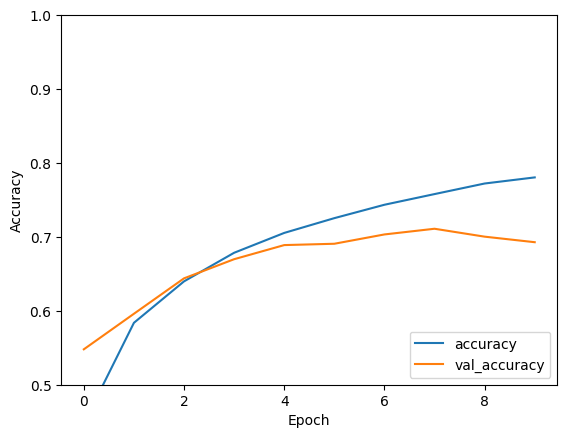

In [49]:
def plotit(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')
    plt.show()  

plotit(history)

In [50]:
def evalu(model):
    test_loss, test_acc = model.evaluate(X_train, y_train, verbose=2)
evalu(model)

1563/1563 - 3s - loss: 0.6124 - accuracy: 0.7866 - 3s/epoch - 2ms/step


## Model-1

Epoch 1/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5146 - accuracy: 0.4494 - val_loss: 1.2705 - val_accuracy: 0.5431
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1446 - accuracy: 0.5975 - val_loss: 1.0356 - val_accuracy: 0.6381
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9954 - accuracy: 0.6500 - val_loss: 0.9695 - val_accuracy: 0.6592
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8971 - accuracy: 0.6836 - val_loss: 0.9413 - val_accuracy: 0.6688
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8269 - accuracy: 0.7107 - val_loss: 0.8851 - val_accuracy: 0.7007
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7729 - accuracy: 0.7283 - val_loss: 0.8544 - val_accuracy: 0.7075
Epoch 7/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7248 - accuracy: 0.7439 - val_loss: 0.9014 - val_accuracy:

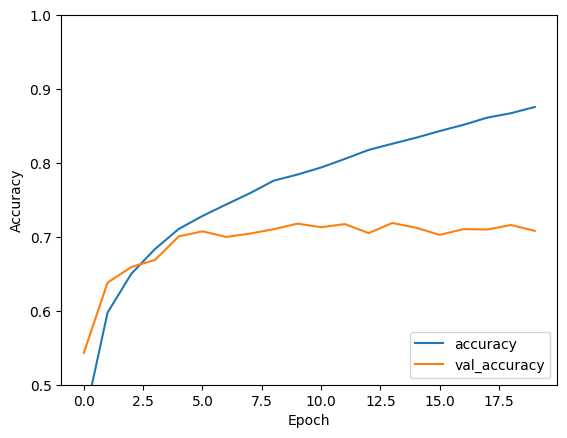

1563/1563 - 3s - loss: 0.2798 - accuracy: 0.9035 - 3s/epoch - 2ms/step


In [57]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))  # Increased epochs to 20
plotit(history)
evalu(model)

## Model-2

In [62]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (1, 1), activation='relu'))  # Added a new convolution layer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 2, 2, 64)        

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7251 - accuracy: 0.3504 - val_loss: 1.4533 - val_accuracy: 0.4639
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3671 - accuracy: 0.5037 - val_loss: 1.3890 - val_accuracy: 0.4945
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2227 - accuracy: 0.5597 - val_loss: 1.1788 - val_accuracy: 0.5794
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1212 - accuracy: 0.5990 - val_loss: 1.1085 - val_accuracy: 0.6017
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0409 - accuracy: 0.6325 - val_loss: 1.0628 - val_accuracy: 0.6207
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9770 - accuracy: 0.6541 - val_loss: 1.0553 - val_accuracy: 0.6291
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9325 - accuracy: 0.6697 - val_loss: 0.9816 - val_accuracy:

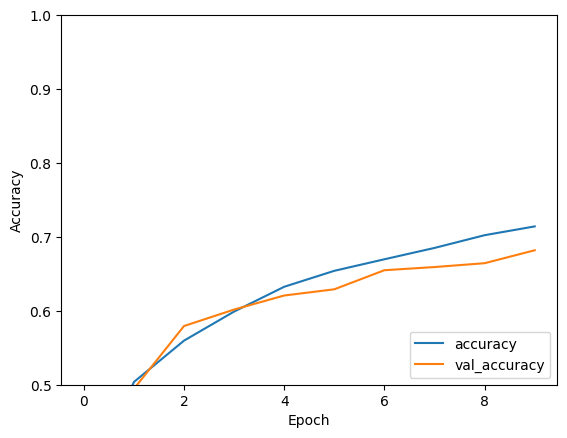

1563/1563 - 3s - loss: 0.7395 - accuracy: 0.7412 - 3s/epoch - 2ms/step


In [63]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))  # Increased epochs to 20
plotit(history)
evalu(model)

## Model-3

In [64]:
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)))  # Increased filter size to (5, 5)
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 2, 2, 64)        

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5911 - accuracy: 0.4163 - val_loss: 1.3747 - val_accuracy: 0.5027
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2652 - accuracy: 0.5471 - val_loss: 1.1744 - val_accuracy: 0.5830
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1049 - accuracy: 0.6079 - val_loss: 1.1795 - val_accuracy: 0.5875
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9974 - accuracy: 0.6489 - val_loss: 0.9895 - val_accuracy: 0.6529
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9134 - accuracy: 0.6797 - val_loss: 0.9914 - val_accuracy: 0.6588
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8566 - accuracy: 0.7002 - val_loss: 0.9288 - val_accuracy: 0.6760
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8047 - accuracy: 0.7172 - val_loss: 0.9549 - val_accuracy:

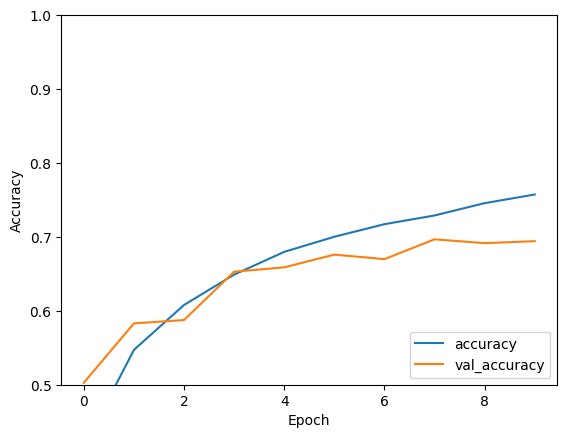

1563/1563 - 3s - loss: 0.6434 - accuracy: 0.7742 - 3s/epoch - 2ms/step


In [65]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))  # Increased epochs to 20
plotit(history)
evalu(model)

## Model-4

In [66]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))  # Added padding='same'
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))  # Added padding='same'
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))  # Added padding='same'
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 4, 4, 64)        

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4517 - accuracy: 0.4701 - val_loss: 1.1239 - val_accuracy: 0.6021
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0388 - accuracy: 0.6341 - val_loss: 0.9718 - val_accuracy: 0.6633
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8908 - accuracy: 0.6884 - val_loss: 0.8904 - val_accuracy: 0.6924
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7930 - accuracy: 0.7226 - val_loss: 0.8446 - val_accuracy: 0.7126
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7235 - accuracy: 0.7483 - val_loss: 0.8250 - val_accuracy: 0.7164
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6697 - accuracy: 0.7668 - val_loss: 0.8317 - val_accuracy: 0.7213
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6184 - accuracy: 0.7837 - val_loss: 0.7939 - val_accuracy:

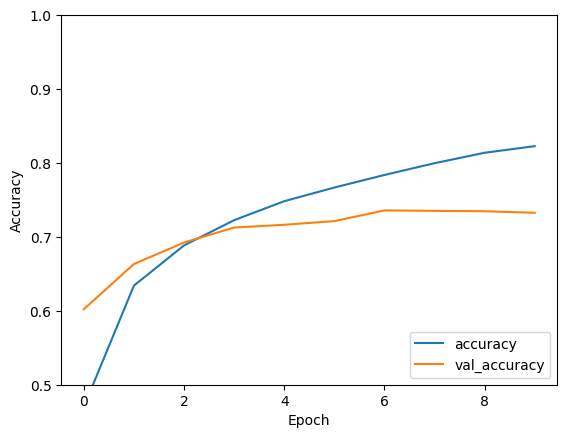

1563/1563 - 3s - loss: 0.4537 - accuracy: 0.8400 - 3s/epoch - 2ms/step


In [68]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))  # Increased epochs to 20
plotit(history)
evalu(model)

## Model-5

In [70]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), strides=(1, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', strides=(1, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', strides=(1, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 2, 2, 64)        

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5572 - accuracy: 0.4309 - val_loss: 1.2954 - val_accuracy: 0.5350
Epoch 2/10
1563/1563 [==============================] - 5s 4ms/step - loss: 1.2091 - accuracy: 0.5714 - val_loss: 1.1421 - val_accuracy: 0.6024
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0661 - accuracy: 0.6253 - val_loss: 1.1034 - val_accuracy: 0.6092
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9749 - accuracy: 0.6582 - val_loss: 0.9832 - val_accuracy: 0.6569
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9092 - accuracy: 0.6800 - val_loss: 0.9558 - val_accuracy: 0.6676
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8579 - accuracy: 0.6990 - val_loss: 0.9801 - val_accuracy: 0.6586
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8117 - accuracy: 0.7166 - val_loss: 0.9147 - val_accuracy:

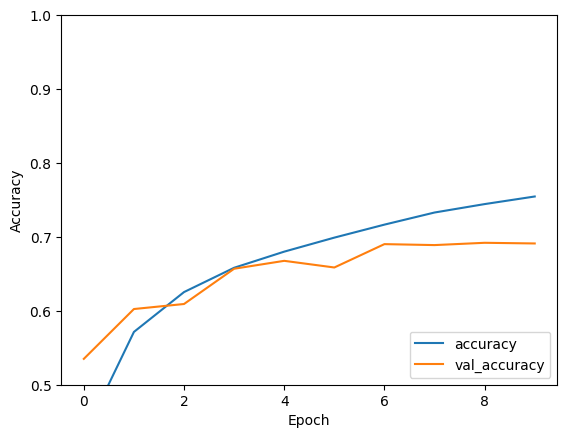

1563/1563 - 3s - loss: 0.6580 - accuracy: 0.7680 - 3s/epoch - 2ms/step


In [71]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))  # Increased epochs to 20
plotit(history)
evalu(model)

## Model-6

In [72]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.AveragePooling2D((2, 2)))  # Changed to AveragePooling2D
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.AveragePooling2D((2, 2)))  # Changed to AveragePooling2D
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.AveragePooling2D((2, 2)))  # Changed to AveragePooling2D
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 average_pooling2d (AverageP  (None, 15, 15, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_34 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 average_pooling2d_1 (Averag  (None, 6, 6, 64)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_35 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 average_pooling2d_2 (Averag  (None, 2, 2, 64)       

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5915 - accuracy: 0.4157 - val_loss: 1.3957 - val_accuracy: 0.4958
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2860 - accuracy: 0.5392 - val_loss: 1.2110 - val_accuracy: 0.5631
Epoch 3/10
1563/1563 [==============================] - 5s 4ms/step - loss: 1.1574 - accuracy: 0.5908 - val_loss: 1.1182 - val_accuracy: 0.6110
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0572 - accuracy: 0.6278 - val_loss: 1.0209 - val_accuracy: 0.6352
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9769 - accuracy: 0.6569 - val_loss: 0.9848 - val_accuracy: 0.6564
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9124 - accuracy: 0.6800 - val_loss: 0.9584 - val_accuracy: 0.6670
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8532 - accuracy: 0.7039 - val_loss: 0.9018 - val_accuracy:

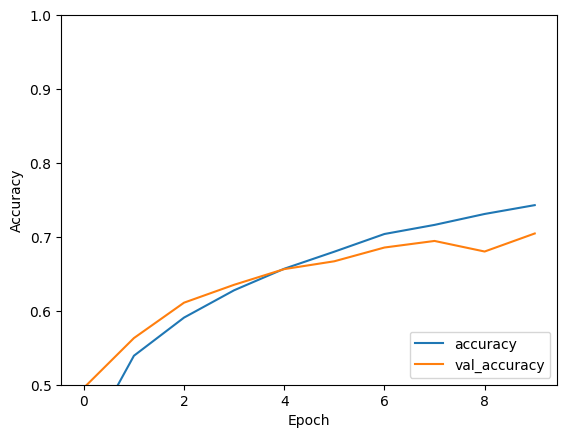

1563/1563 - 3s - loss: 0.7049 - accuracy: 0.7540 - 3s/epoch - 2ms/step


In [73]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))  # Increased epochs to 20
plotit(history)
evalu(model)

## Model-7

In [74]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(32, 32, 3)))  # Changed activation to tanh
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='tanh'))  # Changed activation to tanh
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='tanh'))  # Changed activation to tanh
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='tanh'))  # Changed activation to tanh
model.add(layers.Dense(10))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 2, 2, 64)       

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4123 - accuracy: 0.4930 - val_loss: 1.1916 - val_accuracy: 0.5727
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0913 - accuracy: 0.6187 - val_loss: 1.0765 - val_accuracy: 0.6249
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9664 - accuracy: 0.6602 - val_loss: 0.9735 - val_accuracy: 0.6655
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8777 - accuracy: 0.6944 - val_loss: 0.9316 - val_accuracy: 0.6780
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8119 - accuracy: 0.7158 - val_loss: 0.9736 - val_accuracy: 0.6654
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7598 - accuracy: 0.7367 - val_loss: 0.9250 - val_accuracy: 0.6876
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7178 - accuracy: 0.7528 - val_loss: 0.9488 - val_accuracy:

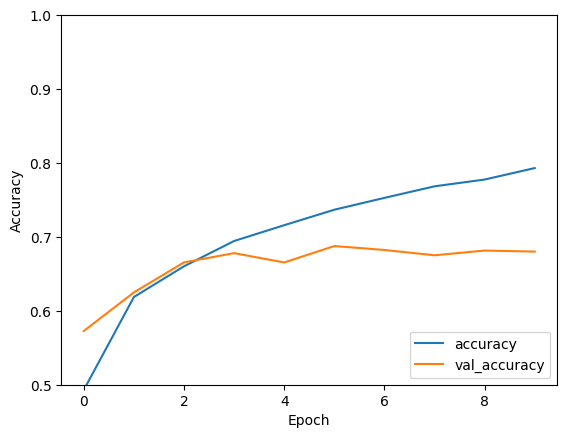

1563/1563 - 3s - loss: 0.5357 - accuracy: 0.8168 - 3s/epoch - 2ms/step


In [75]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))  # Increased epochs to 20
plotit(history)
evalu(model)

## Model-8

In [76]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))  # Added dropout layer
model.add(layers.Dense(10))
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 2, 2, 64)       

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6040 - accuracy: 0.4084 - val_loss: 1.3397 - val_accuracy: 0.5180
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2751 - accuracy: 0.5440 - val_loss: 1.1553 - val_accuracy: 0.5864
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1282 - accuracy: 0.6022 - val_loss: 1.0754 - val_accuracy: 0.6212
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0270 - accuracy: 0.6383 - val_loss: 0.9824 - val_accuracy: 0.6580
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9545 - accuracy: 0.6640 - val_loss: 0.9472 - val_accuracy: 0.6697
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8967 - accuracy: 0.6859 - val_loss: 0.9258 - val_accuracy: 0.6763
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8526 - accuracy: 0.7031 - val_loss: 0.8680 - val_accuracy:

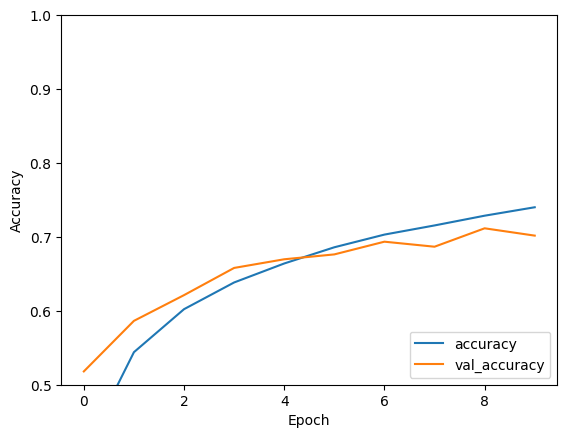

1563/1563 - 3s - loss: 0.6694 - accuracy: 0.7694 - 3s/epoch - 2ms/step


In [77]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))  # Increased epochs to 20
plotit(history)
evalu(model)

## Model-9

In [78]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Changed optimizer to RMSProp

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7020 - accuracy: 0.7535 - val_loss: 0.9150 - val_accuracy: 0.6920
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6787 - accuracy: 0.7629 - val_loss: 0.9976 - val_accuracy: 0.6732
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6537 - accuracy: 0.7726 - val_loss: 0.9084 - val_accuracy: 0.7063
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6369 - accuracy: 0.7773 - val_loss: 0.9221 - val_accuracy: 0.7032
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6192 - accuracy: 0.7837 - val_loss: 0.9365 - val_accuracy: 0.7048
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6020 - accuracy: 0.7876 - val_loss: 0.9597 - val_accuracy: 0.6892
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5852 - accuracy: 0.7953 - val_loss: 0.9513 - val_accuracy:

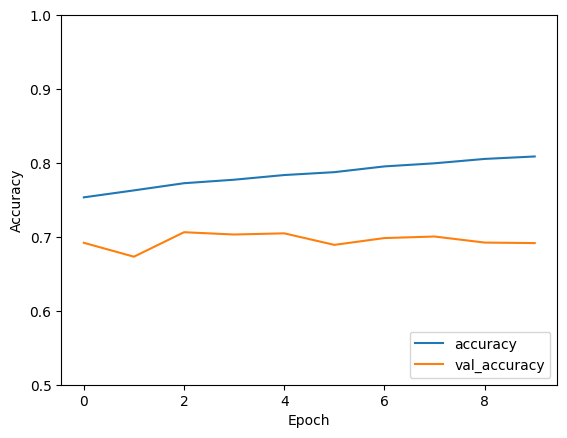

1563/1563 - 3s - loss: 0.5043 - accuracy: 0.8221 - 3s/epoch - 2ms/step


In [80]:
model.compile(optimizer='rmsprop', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val)) 
plotit(history)
evalu(model)

# PART-B 

In [3]:
train_dir = 'E:/cards_data/train'
test_dir = 'E:/cards_data/test'
valid_dir = 'E:/cards_data/valid'

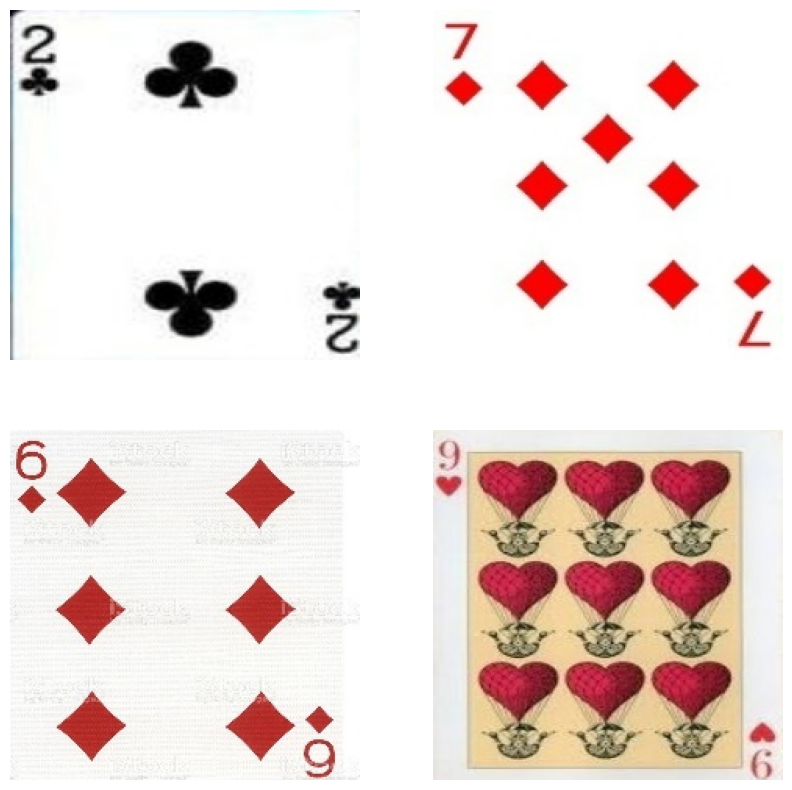

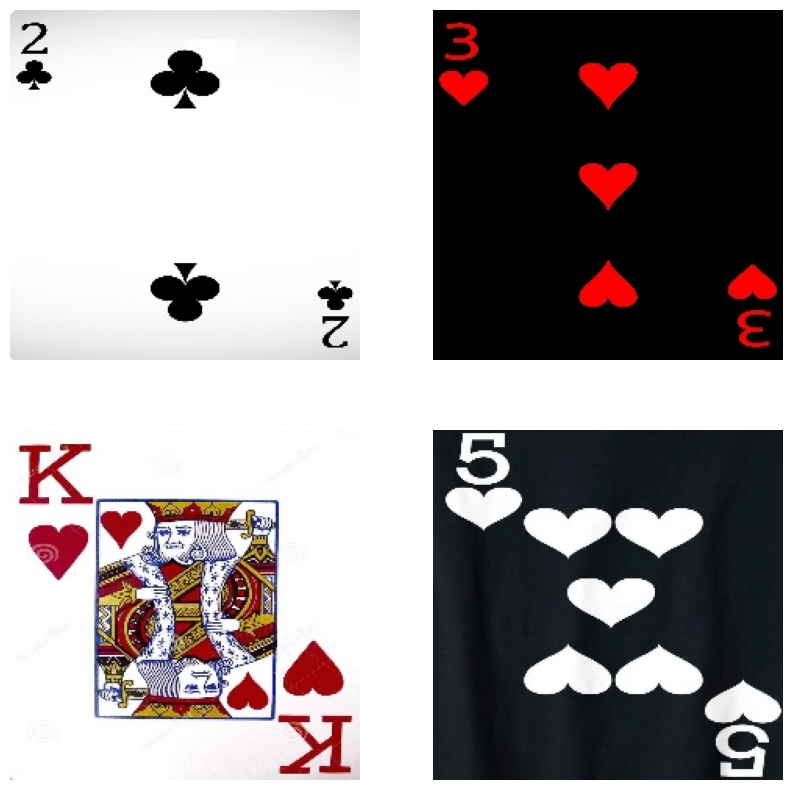

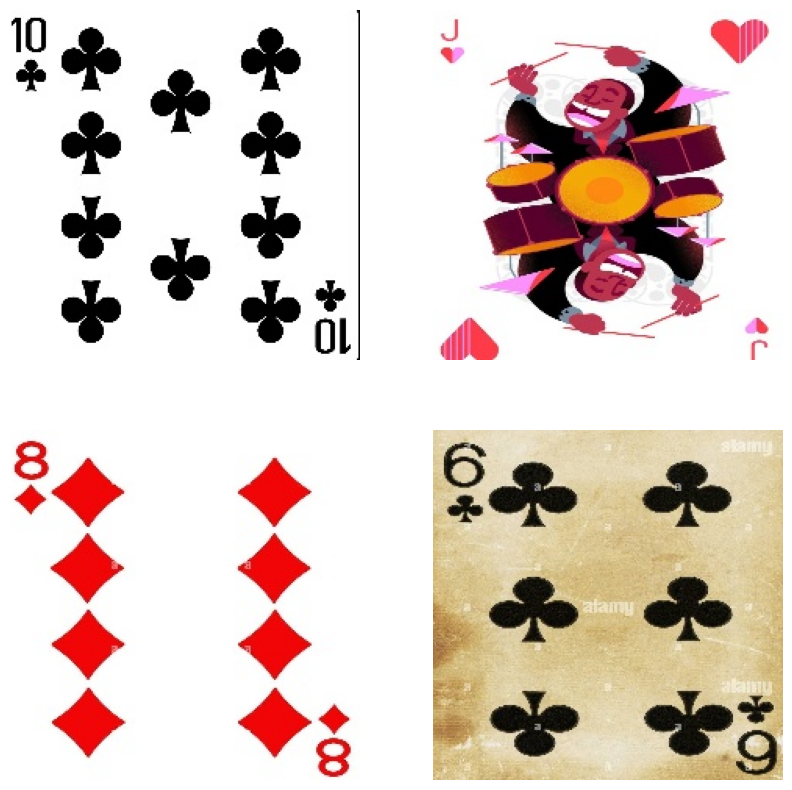

In [4]:
import matplotlib.pyplot as plt
import os
import cv2

def plot_images(directory, num_images=4):
  image_paths = [os.path.join(root, file) for root, _, files in os.walk(directory) for file in files]
  import random
  random.shuffle(image_paths)

  plt.figure(figsize=(10, 10))
  for i in range(num_images):
    img = cv2.imread(image_paths[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    plt.subplot(2, 2, i + 1)
    plt.imshow(img)
    plt.axis('off')
  plt.show()

plot_images(train_dir)
plot_images(test_dir)
plot_images(valid_dir)

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'E:/cards_data/train',
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    'E:/cards_data/test',
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    'E:/cards_data/valid',
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical'
)


Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.


## Model-0

In [17]:
model = models.Sequential()
model.add(layers.Conv2D(96, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(53))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 96)      2688      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 111, 111, 96)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 109, 109, 64)      55360     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 52, 52, 64)        36928     
                                                                 
 global_average_pooling2d_5   (None, 64)              

In [22]:
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


In [23]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10, 
    validation_data=valid_generator,
    validation_steps=len(valid_generator)
)

Epoch 1/10
239/239 [==============================] - 6s 23ms/step - loss: 2.7974 - accuracy: 0.1783 - val_loss: 2.5049 - val_accuracy: 0.1811
Epoch 2/10
239/239 [==============================] - 5s 22ms/step - loss: 2.6064 - accuracy: 0.2228 - val_loss: 2.3479 - val_accuracy: 0.2226
Epoch 3/10
239/239 [==============================] - 5s 22ms/step - loss: 2.4532 - accuracy: 0.2715 - val_loss: 2.1625 - val_accuracy: 0.3057
Epoch 4/10
239/239 [==============================] - 5s 22ms/step - loss: 2.3137 - accuracy: 0.2962 - val_loss: 2.0733 - val_accuracy: 0.3094
Epoch 5/10
239/239 [==============================] - 6s 23ms/step - loss: 2.1897 - accuracy: 0.3376 - val_loss: 1.8948 - val_accuracy: 0.3849
Epoch 6/10
239/239 [==============================] - 5s 21ms/step - loss: 2.0825 - accuracy: 0.3755 - val_loss: 1.8272 - val_accuracy: 0.3849
Epoch 7/10
239/239 [==============================] - 5s 21ms/step - loss: 1.9816 - accuracy: 0.4024 - val_loss: 1.7007 - val_accuracy: 0.4340

In [6]:
def plotit(history):

    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')
    plt.show()  

plotit(history)

In [7]:
def evalu(model, test_generator):
    test_loss, test_acc = model.evaluate(test_generator, verbose=2)
    print(f'Test loss: {test_loss:.3f}')
    print(f'Test accuracy: {test_acc:.3f}')

evalu(model, test_generator)

## Model-1

Epoch 1/50
239/239 [==============================] - 6s 21ms/step - loss: 1.6605 - accuracy: 0.5178 - val_loss: 1.4464 - val_accuracy: 0.5736
Epoch 2/50
239/239 [==============================] - 5s 21ms/step - loss: 1.5767 - accuracy: 0.5412 - val_loss: 1.3274 - val_accuracy: 0.5623
Epoch 3/50
239/239 [==============================] - 5s 21ms/step - loss: 1.5223 - accuracy: 0.5582 - val_loss: 1.3665 - val_accuracy: 0.5811
Epoch 4/50
239/239 [==============================] - 5s 21ms/step - loss: 1.4609 - accuracy: 0.5729 - val_loss: 1.3186 - val_accuracy: 0.5925
Epoch 5/50
239/239 [==============================] - 5s 21ms/step - loss: 1.4048 - accuracy: 0.5943 - val_loss: 1.3217 - val_accuracy: 0.6000
Epoch 6/50
239/239 [==============================] - 5s 21ms/step - loss: 1.3647 - accuracy: 0.5997 - val_loss: 1.3386 - val_accuracy: 0.6038
Epoch 7/50
239/239 [==============================] - 6s 23ms/step - loss: 1.3185 - accuracy: 0.6137 - val_loss: 1.3462 - val_accuracy: 0.5811

C:\Users\ratis\AppData\Local\Temp\ipykernel_16540\523505488.py:7: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim([0.5, 0.5])


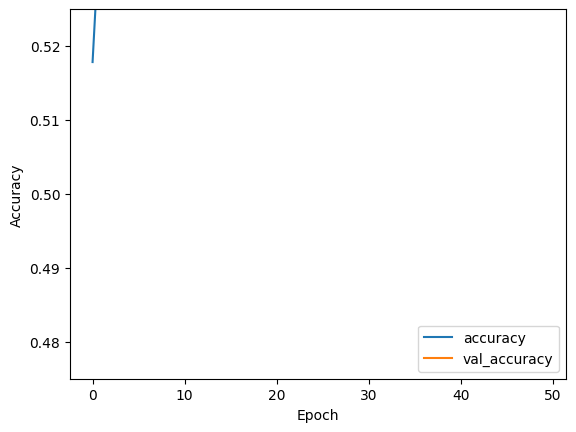

TypeError: evalu() missing 1 required positional argument: 'test_generator'

In [28]:
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50, # increased epochs to 50
    validation_data=valid_generator,
    validation_steps=len(valid_generator)
) 
plotit(history)
evalu(model,test_generator)

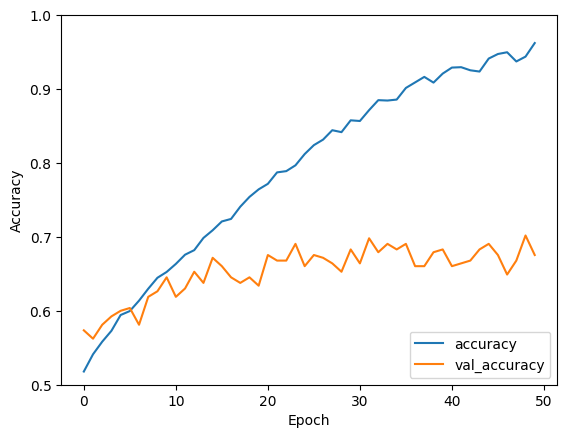

9/9 - 0s - loss: 3.2400 - accuracy: 0.6226 - 199ms/epoch - 22ms/step
Test loss: 3.240
Test accuracy: 0.623


In [30]:
plotit(history)
evalu(model,test_generator)

## Model-2

In [39]:
model = models.Sequential()
model.add(layers.Conv2D(96, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (1, 1), activation='relu'))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(53))
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 222, 222, 96)      2688      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 111, 111, 96)     0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 109, 109, 64)      55360     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 26, 26, 64)     

Epoch 1/30
239/239 [==============================] - 5s 21ms/step - loss: 1.6721 - accuracy: 0.4967 - val_loss: 1.5089 - val_accuracy: 0.5170
Epoch 2/30
239/239 [==============================] - 5s 23ms/step - loss: 1.5924 - accuracy: 0.5143 - val_loss: 1.4694 - val_accuracy: 0.5396
Epoch 3/30
239/239 [==============================] - 6s 23ms/step - loss: 1.5296 - accuracy: 0.5454 - val_loss: 1.4049 - val_accuracy: 0.5736
Epoch 4/30
239/239 [==============================] - 5s 22ms/step - loss: 1.4577 - accuracy: 0.5651 - val_loss: 1.4877 - val_accuracy: 0.5509
Epoch 5/30
239/239 [==============================] - 5s 21ms/step - loss: 1.4021 - accuracy: 0.5830 - val_loss: 1.4265 - val_accuracy: 0.5698
Epoch 6/30
239/239 [==============================] - 5s 21ms/step - loss: 1.3228 - accuracy: 0.6039 - val_loss: 1.3280 - val_accuracy: 0.5849
Epoch 7/30
239/239 [==============================] - 5s 21ms/step - loss: 1.2723 - accuracy: 0.6207 - val_loss: 1.3588 - val_accuracy: 0.6000

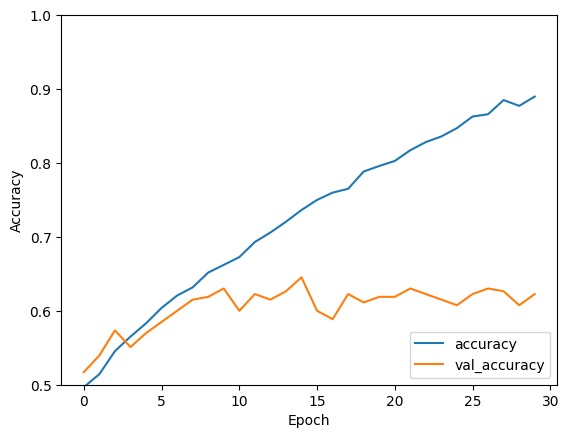

9/9 - 0s - loss: 2.5074 - accuracy: 0.5774 - 192ms/epoch - 21ms/step
Test loss: 2.507
Test accuracy: 0.577


In [41]:
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=30, 
    validation_data=valid_generator,
    validation_steps=len(valid_generator)
) 
plotit(history)
evalu(model,test_generator)

## Model-3

In [42]:
model = models.Sequential()
model.add(layers.Conv2D(96, (5, 5), activation='relu', input_shape=(224, 224, 3))) # increased filter size to (5,5)
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (1, 1), activation='relu'))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(53))

Epoch 1/25
239/239 [==============================] - 6s 22ms/step - loss: 3.7749 - accuracy: 0.0438 - val_loss: 3.2643 - val_accuracy: 0.0679
Epoch 2/25
239/239 [==============================] - 5s 20ms/step - loss: 3.0661 - accuracy: 0.1360 - val_loss: 2.6764 - val_accuracy: 0.1698
Epoch 3/25
239/239 [==============================] - 5s 20ms/step - loss: 2.6904 - accuracy: 0.2139 - val_loss: 2.3103 - val_accuracy: 0.2377
Epoch 4/25
239/239 [==============================] - 5s 20ms/step - loss: 2.4290 - accuracy: 0.2764 - val_loss: 2.0092 - val_accuracy: 0.3283
Epoch 5/25
239/239 [==============================] - 5s 21ms/step - loss: 2.2485 - accuracy: 0.3168 - val_loss: 1.9669 - val_accuracy: 0.3811
Epoch 6/25
239/239 [==============================] - 5s 21ms/step - loss: 2.1306 - accuracy: 0.3645 - val_loss: 1.7326 - val_accuracy: 0.4340
Epoch 7/25
239/239 [==============================] - 6s 23ms/step - loss: 2.0034 - accuracy: 0.4003 - val_loss: 1.7625 - val_accuracy: 0.4302

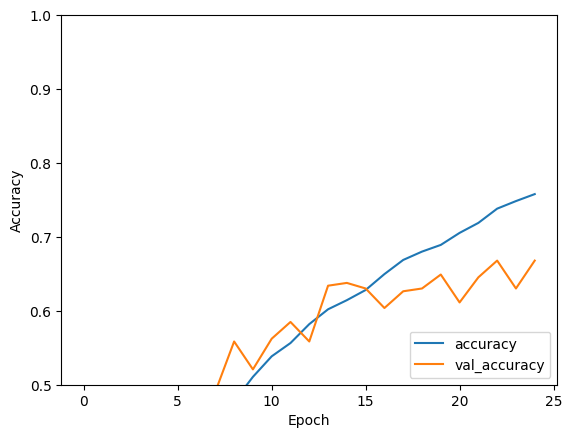

9/9 - 0s - loss: 1.9381 - accuracy: 0.6189 - 186ms/epoch - 21ms/step
Test loss: 1.938
Test accuracy: 0.619


In [43]:
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=25, 
    validation_data=valid_generator,
    validation_steps=len(valid_generator)
) 
plotit(history)
evalu(model,test_generator)

## Model-4

In [44]:
model = models.Sequential()
model.add(layers.Conv2D(96, (3, 3), activation='relu', input_shape=(224, 224, 3), padding='same'))# added paddings here and there
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (1, 1), activation='relu', padding='same'))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(53))
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 224, 224, 96)      2688      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 112, 112, 96)     0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 112, 112, 64)      55360     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 56, 56, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 28, 28, 64)     

Epoch 1/25
239/239 [==============================] - 6s 23ms/step - loss: 3.9358 - accuracy: 0.0227 - val_loss: 3.6172 - val_accuracy: 0.0377
Epoch 2/25
239/239 [==============================] - 5s 22ms/step - loss: 3.3013 - accuracy: 0.0858 - val_loss: 2.9918 - val_accuracy: 0.0792
Epoch 3/25
239/239 [==============================] - 5s 22ms/step - loss: 2.8975 - accuracy: 0.1529 - val_loss: 2.5298 - val_accuracy: 0.2415
Epoch 4/25
239/239 [==============================] - 6s 26ms/step - loss: 2.6209 - accuracy: 0.2261 - val_loss: 2.2632 - val_accuracy: 0.2604
Epoch 5/25
239/239 [==============================] - 6s 24ms/step - loss: 2.3959 - accuracy: 0.2884 - val_loss: 1.9863 - val_accuracy: 0.3321
Epoch 6/25
239/239 [==============================] - 7s 27ms/step - loss: 2.2619 - accuracy: 0.3194 - val_loss: 1.9032 - val_accuracy: 0.3585
Epoch 7/25
239/239 [==============================] - 5s 21ms/step - loss: 2.1565 - accuracy: 0.3520 - val_loss: 1.9135 - val_accuracy: 0.3547

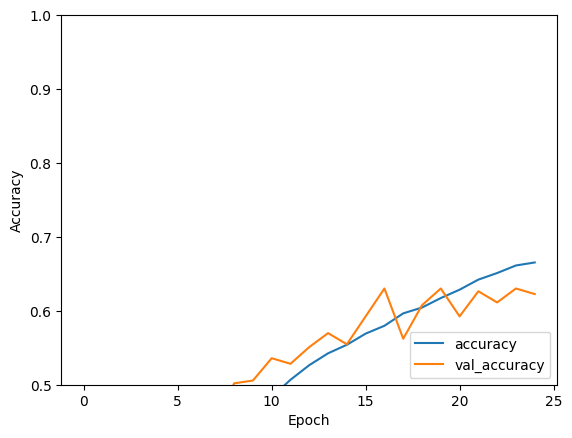

9/9 - 0s - loss: 1.4087 - accuracy: 0.6377 - 223ms/epoch - 25ms/step
Test loss: 1.409
Test accuracy: 0.638


In [45]:
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=25, 
    validation_data=valid_generator,
    validation_steps=len(valid_generator)
) 
plotit(history)
evalu(model,test_generator)

## Model-5

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(96, (3, 3), activation='relu', input_shape=(224, 224, 3), strides=(1, 1)))#different stride
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', strides=(1, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', strides=(1, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (1, 1), activation='relu', strides=(1, 1)))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(53))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 96)      2688      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 96)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      55360     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

Epoch 1/25
239/239 [==============================] - 9s 23ms/step - loss: 3.8186 - accuracy: 0.0352 - val_loss: 3.3919 - val_accuracy: 0.0642
Epoch 2/25
239/239 [==============================] - 5s 22ms/step - loss: 3.2570 - accuracy: 0.1014 - val_loss: 2.9900 - val_accuracy: 0.1057
Epoch 3/25
239/239 [==============================] - 6s 23ms/step - loss: 2.8921 - accuracy: 0.1633 - val_loss: 2.5852 - val_accuracy: 0.1660
Epoch 4/25
239/239 [==============================] - 5s 22ms/step - loss: 2.6709 - accuracy: 0.2112 - val_loss: 2.3673 - val_accuracy: 0.2189
Epoch 5/25
239/239 [==============================] - 5s 22ms/step - loss: 2.4477 - accuracy: 0.2513 - val_loss: 2.0748 - val_accuracy: 0.2906
Epoch 6/25
239/239 [==============================] - 5s 23ms/step - loss: 2.3026 - accuracy: 0.2964 - val_loss: 2.0017 - val_accuracy: 0.3547
Epoch 7/25
239/239 [==============================] - 5s 23ms/step - loss: 2.1755 - accuracy: 0.3341 - val_loss: 1.8709 - val_accuracy: 0.3245

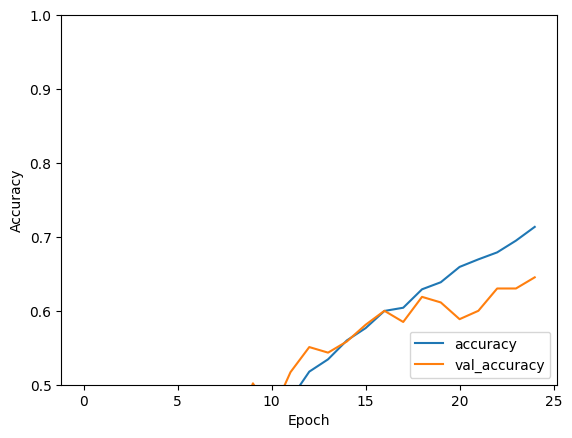

9/9 - 0s - loss: 1.7238 - accuracy: 0.5585 - 227ms/epoch - 25ms/step
Test loss: 1.724
Test accuracy: 0.558


In [9]:
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=25, 
    validation_data=valid_generator,
    validation_steps=len(valid_generator)
) 
plotit(history)
evalu(model,test_generator)

## Model-6

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(96, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.AveragePooling2D((2, 2)))# AVGpooling instead of maxpooling
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.AveragePooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.AveragePooling2D((2, 2)))
model.add(layers.Conv2D(32, (1, 1), activation='relu'))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(53))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 96)      2688      
                                                                 
 average_pooling2d (AverageP  (None, 111, 111, 96)     0         
 ooling2D)                                                       
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      55360     
                                                                 
 average_pooling2d_1 (Averag  (None, 54, 54, 64)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 average_pooling2d_2 (Averag  (None, 26, 26, 64)      

Epoch 1/25
239/239 [==============================] - 6s 22ms/step - loss: 3.8343 - accuracy: 0.0404 - val_loss: 3.4348 - val_accuracy: 0.0755
Epoch 2/25
239/239 [==============================] - 5s 22ms/step - loss: 3.3135 - accuracy: 0.0801 - val_loss: 2.9936 - val_accuracy: 0.0868
Epoch 3/25
239/239 [==============================] - 6s 23ms/step - loss: 3.1359 - accuracy: 0.1124 - val_loss: 2.8731 - val_accuracy: 0.1472
Epoch 4/25
239/239 [==============================] - 5s 23ms/step - loss: 3.0011 - accuracy: 0.1346 - val_loss: 2.8012 - val_accuracy: 0.1358
Epoch 5/25
239/239 [==============================] - 6s 25ms/step - loss: 2.8939 - accuracy: 0.1632 - val_loss: 2.8263 - val_accuracy: 0.1358
Epoch 6/25
239/239 [==============================] - 5s 23ms/step - loss: 2.8156 - accuracy: 0.1713 - val_loss: 2.6093 - val_accuracy: 0.1434
Epoch 7/25
239/239 [==============================] - 6s 23ms/step - loss: 2.7403 - accuracy: 0.1894 - val_loss: 2.5504 - val_accuracy: 0.2075

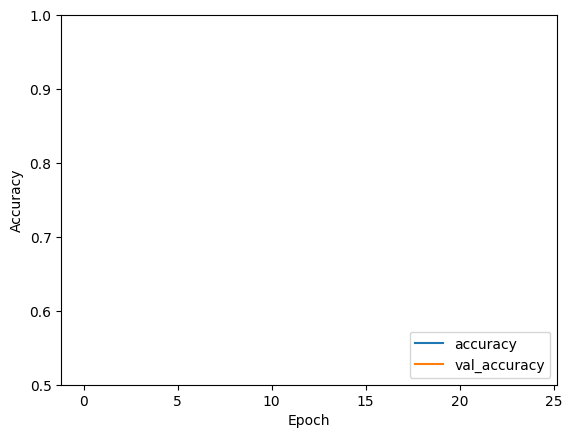

9/9 - 0s - loss: 1.9480 - accuracy: 0.4189 - 213ms/epoch - 24ms/step
Test loss: 1.948
Test accuracy: 0.419


In [11]:
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=25, 
    validation_data=valid_generator,
    validation_steps=len(valid_generator)
) 
plotit(history)
evalu(model,test_generator)

## Model-7

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(96, (3, 3), activation='tanh', input_shape=(224, 224, 3), padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='tanh', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='tanh', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (1, 1), activation='tanh', padding='same'))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(53))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 224, 224, 96)      2688      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 96)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 112, 112, 64)      55360     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 28, 64)      

Epoch 1/25
239/239 [==============================] - 6s 24ms/step - loss: 3.6128 - accuracy: 0.0636 - val_loss: 3.0841 - val_accuracy: 0.1019
Epoch 2/25
239/239 [==============================] - 5s 23ms/step - loss: 3.0580 - accuracy: 0.1369 - val_loss: 2.7153 - val_accuracy: 0.1811
Epoch 3/25
239/239 [==============================] - 5s 22ms/step - loss: 2.7799 - accuracy: 0.2003 - val_loss: 2.5111 - val_accuracy: 0.2151
Epoch 4/25
239/239 [==============================] - 5s 21ms/step - loss: 2.5530 - accuracy: 0.2549 - val_loss: 2.2572 - val_accuracy: 0.2906
Epoch 5/25
239/239 [==============================] - 5s 21ms/step - loss: 2.3765 - accuracy: 0.2991 - val_loss: 2.0606 - val_accuracy: 0.3321
Epoch 6/25
239/239 [==============================] - 5s 21ms/step - loss: 2.2416 - accuracy: 0.3303 - val_loss: 2.0255 - val_accuracy: 0.3434
Epoch 7/25
239/239 [==============================] - 5s 23ms/step - loss: 2.1368 - accuracy: 0.3540 - val_loss: 1.9476 - val_accuracy: 0.3509

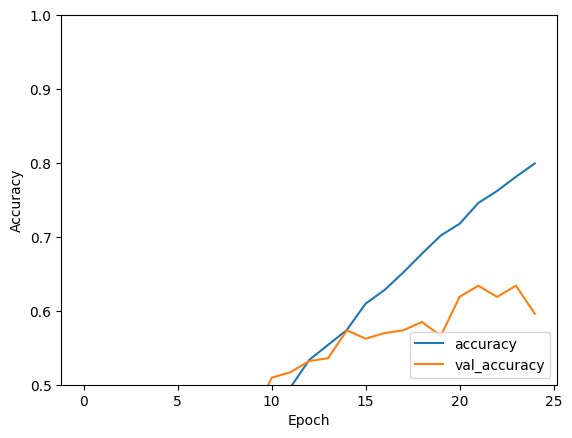

9/9 - 0s - loss: 1.5062 - accuracy: 0.6377 - 197ms/epoch - 22ms/step
Test loss: 1.506
Test accuracy: 0.638


In [13]:
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=25, 
    validation_data=valid_generator,
    validation_steps=len(valid_generator)
) 
plotit(history)
evalu(model,test_generator)

## Model-8

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(96, (3, 3), activation='relu', input_shape=(224, 224, 3), padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(32, (1, 1), activation='relu', padding='same'))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(53))
model.summary()

Epoch 1/25
239/239 [==============================] - 6s 23ms/step - loss: 3.9325 - accuracy: 0.0262 - val_loss: 3.6727 - val_accuracy: 0.0491
Epoch 2/25
239/239 [==============================] - 6s 24ms/step - loss: 3.5102 - accuracy: 0.0636 - val_loss: 2.9807 - val_accuracy: 0.1094
Epoch 3/25
239/239 [==============================] - 6s 23ms/step - loss: 3.1715 - accuracy: 0.0947 - val_loss: 2.7440 - val_accuracy: 0.1623
Epoch 4/25
239/239 [==============================] - 6s 23ms/step - loss: 2.9865 - accuracy: 0.1219 - val_loss: 2.5244 - val_accuracy: 0.2264
Epoch 5/25
239/239 [==============================] - 6s 24ms/step - loss: 2.8594 - accuracy: 0.1474 - val_loss: 2.3883 - val_accuracy: 0.2340
Epoch 6/25
239/239 [==============================] - 5s 21ms/step - loss: 2.7408 - accuracy: 0.1776 - val_loss: 2.2510 - val_accuracy: 0.2566
Epoch 7/25
239/239 [==============================] - 5s 22ms/step - loss: 2.6219 - accuracy: 0.2032 - val_loss: 2.1208 - val_accuracy: 0.2830

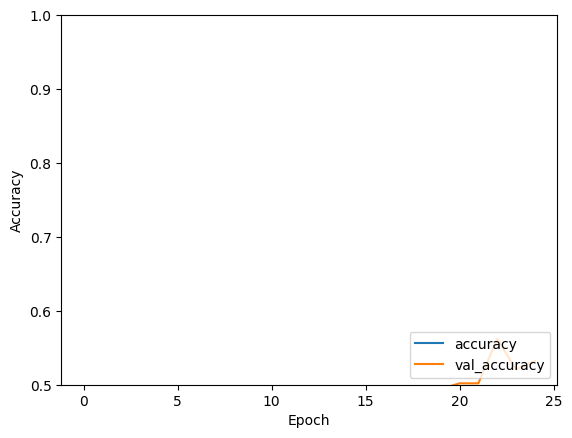

9/9 - 0s - loss: 1.5808 - accuracy: 0.4830 - 192ms/epoch - 21ms/step
Test loss: 1.581
Test accuracy: 0.483


In [15]:
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=25, 
    validation_data=valid_generator,
    validation_steps=len(valid_generator)
) 
plotit(history)
evalu(model,test_generator)

## Model-9

In [18]:
model = models.Sequential()
model.add(layers.Conv2D(96, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (1, 1), activation='relu'))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(53))
model.summary()
# Changed optimizer to RMSProp

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 96)      2688      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 111, 111, 96)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 109, 109, 64)      55360     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 26, 26, 64)      

Epoch 1/25
239/239 [==============================] - 6s 22ms/step - loss: 3.6997 - accuracy: 0.0547 - val_loss: 3.1831 - val_accuracy: 0.0868
Epoch 2/25
239/239 [==============================] - 6s 26ms/step - loss: 3.1350 - accuracy: 0.1203 - val_loss: 2.8218 - val_accuracy: 0.1509
Epoch 3/25
239/239 [==============================] - 6s 24ms/step - loss: 2.8185 - accuracy: 0.1943 - val_loss: 2.6554 - val_accuracy: 0.1811
Epoch 4/25
239/239 [==============================] - 5s 22ms/step - loss: 2.5618 - accuracy: 0.2497 - val_loss: 2.2107 - val_accuracy: 0.3019
Epoch 5/25
239/239 [==============================] - 5s 23ms/step - loss: 2.3544 - accuracy: 0.2981 - val_loss: 2.0105 - val_accuracy: 0.3208
Epoch 6/25
239/239 [==============================] - 5s 22ms/step - loss: 2.2000 - accuracy: 0.3471 - val_loss: 1.8914 - val_accuracy: 0.3849
Epoch 7/25
239/239 [==============================] - 5s 22ms/step - loss: 2.0614 - accuracy: 0.3801 - val_loss: 1.7656 - val_accuracy: 0.4038

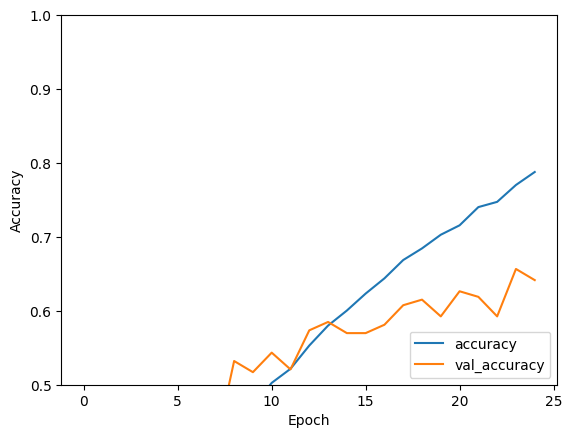

9/9 - 0s - loss: 1.8744 - accuracy: 0.5811 - 225ms/epoch - 25ms/step
Test loss: 1.874
Test accuracy: 0.581


In [19]:
model.compile(optimizer='RMSprop', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=25, 
    validation_data=valid_generator,
    validation_steps=len(valid_generator)
) 
plotit(history)
evalu(model,test_generator)

In [ ]:
!conda install nbconvert